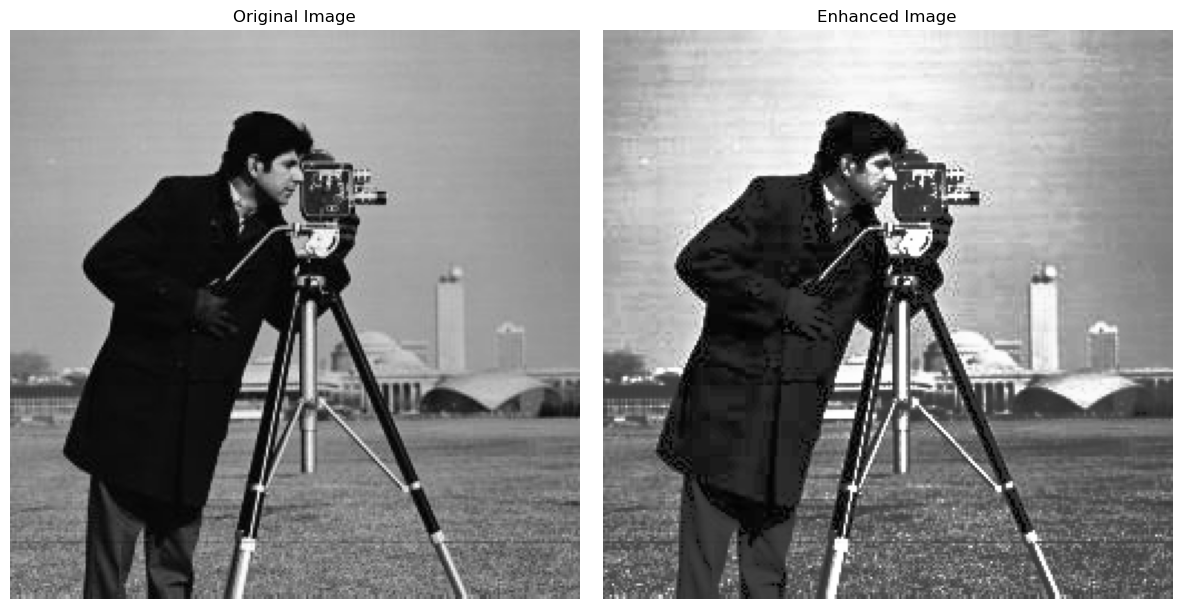

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equalisation(input_Image):
    gray_image = cv2.cvtColor(input_Image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    enhanced_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

    return enhanced_image

image_path = 'cameraman.jpg'

if not os.path.exists(image_path):
    print("File does not exist. Please check the path.")
else:
    input_Image = cv2.imread(image_path)

    enhanced_Image = histogram_equalisation(input_Image)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(input_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(cv2.cvtColor(enhanced_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [2]:
import cv2

# Load the image
image = cv2.imread('cameraman.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply high contrast
high_contrast_image = cv2.equalizeHist(gray_image)

# Apply low contrast
low_contrast_image = cv2.equalizeHist(cv2.bitwise_not(gray_image))

# Save the images
cv2.imwrite('high_contrast_image.jpg', high_contrast_image)
cv2.imwrite('low_contrast_image.jpg', low_contrast_image)

True

In [3]:
import cv2
import numpy as np

def histogram_sp(input_image, specified_image, no_of_bins=256):
    input_hist, _ = np.histogram(input_image.flatten(), bins=no_of_bins, range=(0, 256))
    input_hist = input_hist.astype('float32')
    input_hist /= np.sum(input_hist)

    specified_hist, _ = np.histogram(specified_image.flatten(), bins=no_of_bins, range=(0, 256))
    specified_hist = specified_hist.astype('float32')
    specified_hist /= np.sum(specified_hist)
    specified_cdf = np.cumsum(specified_hist)
    specified_cdf_m = np.ma.masked_equal(specified_cdf, 0)
    specified_cdf_m = (specified_cdf_m - specified_cdf_m.min()) * 255 / (specified_cdf_m.max() - specified_cdf_m.min())
    specified_cdf = np.ma.filled(specified_cdf_m, 0).astype('uint8')
    input_cdf = np.cumsum(input_hist)
    input_cdf_m = np.ma.masked_equal(input_cdf, 0)
    input_cdf_m = (input_cdf_m - input_cdf_m.min()) * 255 / (input_cdf_m.max() - input_cdf_m.min())
    input_cdf = np.ma.filled(input_cdf_m, 0).astype('uint8')

    enhanced_image = np.interp(input_image.flatten(), input_cdf, specified_cdf)
    enhanced_image = enhanced_image.reshape(input_image.shape)

    return enhanced_image

input_image = cv2.imread('high_contrast_image.jpg', cv2.IMREAD_GRAYSCALE)
specified_image = cv2.imread('Low_contrast_image.jpg', cv2.IMREAD_GRAYSCALE)

enhanced_image = histogram_sp(input_image, specified_image)

cv2.imwrite('enhanced_image.jpg', enhanced_image)

True

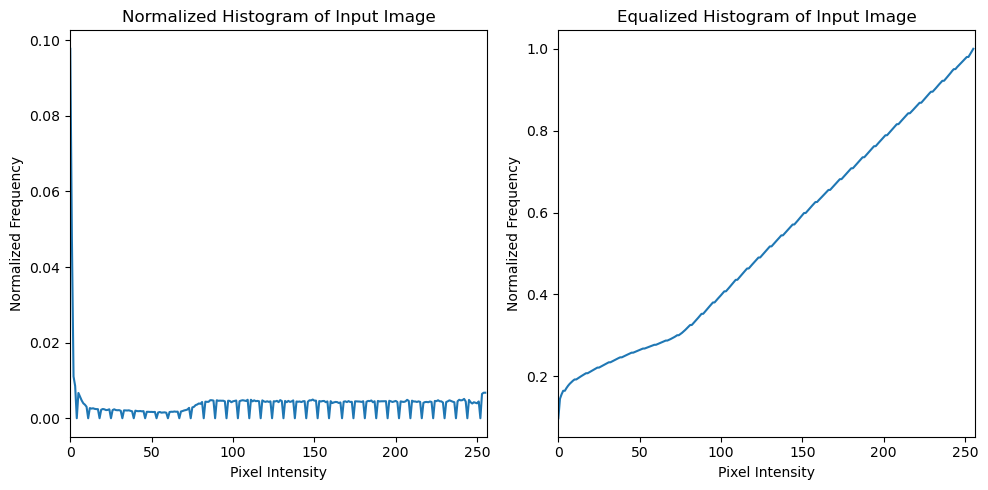

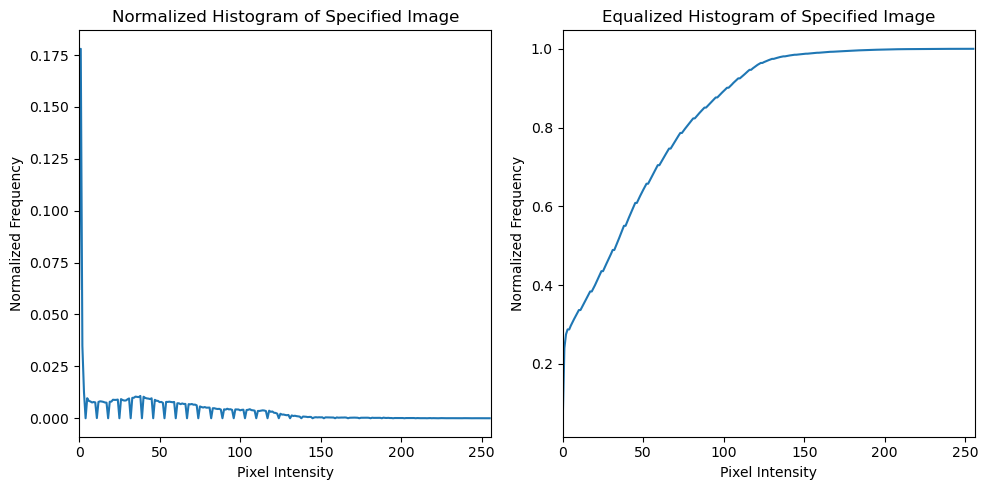

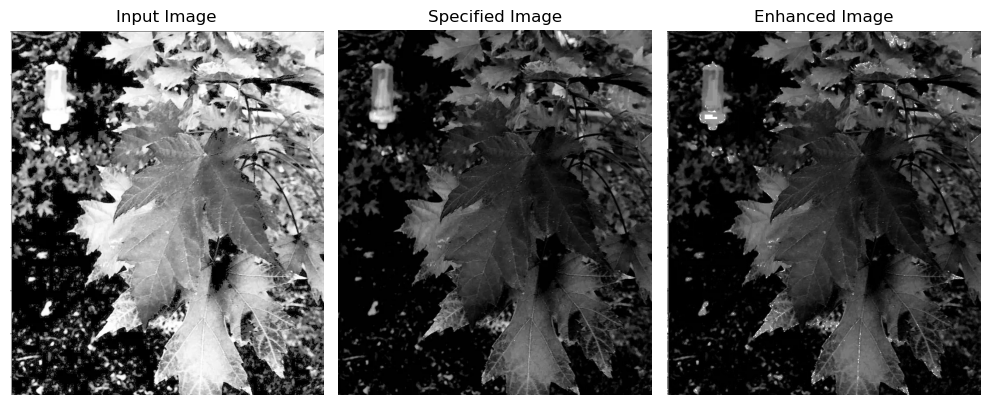

In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def normalize_histogram(hist):
    return hist / hist.sum()

def histogram_equalization(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]  # Normalize
    equalized_image = np.interp(image.flatten(), range(256), cdf_normalized * 255)
    return equalized_image.reshape(image.shape).astype(np.uint8), hist, cdf_normalized

def plot_histograms(original_hist, equalized_hist, title):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title(f'Normalized Histogram of {title}')
    plt.plot(original_hist)
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Normalized Frequency')

    plt.subplot(1, 2, 2)
    plt.title(f'Equalized Histogram of {title}')
    plt.plot(equalized_hist)
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Normalized Frequency')

    plt.tight_layout()
    plt.show()

def histogram_sp(input_image, specified_image, num_bins):
    # Equalize 
    equalized_input, hist_input, cdf_input = histogram_equalization(input_image)
    equalized_specified, hist_specified, cdf_specified = histogram_equalization(specified_image)

    norm_hist_input = normalize_histogram(hist_input)
    norm_hist_specified = normalize_histogram(hist_specified)

    plot_histograms(norm_hist_input, cdf_input, 'Input Image')
    plot_histograms(norm_hist_specified, cdf_specified, 'Specified Image')

    mapping = np.zeros(256)
    g_index = 0
    for f_index in range(256):
        while g_index < 255 and cdf_specified[g_index] < cdf_input[f_index]:
            g_index += 1
        mapping[f_index] = g_index
    enhanced_image = mapping[equalized_input].astype(np.uint8)

    return enhanced_image

input_image = cv2.imread('leafl.jpg', cv2.IMREAD_GRAYSCALE)
specified_image = cv2.imread('leafh.jpg', cv2.IMREAD_GRAYSCALE)
num_bins = 256

enhanced_image = histogram_sp(input_image, specified_image, num_bins)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Specified Image')
plt.imshow(specified_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Enhanced Image')
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()